<a href="https://colab.research.google.com/github/anandvardhan09/PyTorch/blob/main/LInearRegressionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device:{device}")

using device:cuda


In [ ]:
!nvidia-smi


Tue Aug 22 16:42:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#create some data using linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

#create range values
start = 0
end = 1
step = 0.02

#create X and Y (featuers and labels)
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias
x[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#split data
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):

  """
  plots training data,test data and compares predictions.
  """
  plt.figure(figsize=(7, 4))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  #Are there predictions?
  if predictions is not None:
    #plot predicons if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  #Show the legend
  plt.legend(prop={"size": 14});


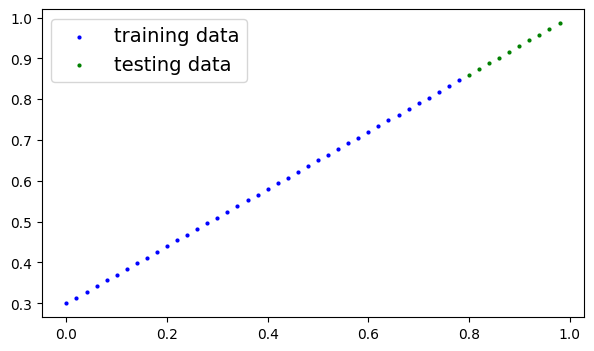

In [ ]:

#plot the data
plot_predictions(x_train,y_train,x_test,y_test)

In [ ]:
#create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__ (self):
    super().__init__()
    #use nn.linear() for creating the model parameters/linear transform
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#check the model current device
next (model_1.parameters()).device

device(type='cpu')

In [ ]:
#set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
#Training

#loss function
#optimizer
#training loop
#testing loop


In [ ]:
#set up loss function
loss_fn = nn.L1Loss() #same as MAE
# loss_fn = nn.MSELoss()

#Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)


In [ ]:
#Training Loop
torch.manual_seed(42)

epochs = 200

#put data on the target device (device agnostic code for data)
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
    model_1.train()

    #1.Forward pass
    y_pred = model_1(x_train)

    #2.calculate the loss
    loss = loss_fn(y_pred, y_train)

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. perform backpropagation
    loss.backward()

    #5 optimizer stepoptim
    optimizer.step()

    ###Testing
    model_1.eval()
    with torch.inference_mode():
      test_pred = model_1(x_test)

      test_loss = loss_fn(test_pred, y_test)

      #print out what's happening
      if epoch % 10 ==0:
        print(f"epoch:{epoch} | Loss: {loss} | Test loss: {test_loss}")

NameError: ignored

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
#turn model into evaluation model
model_1.eval()

#Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(x_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

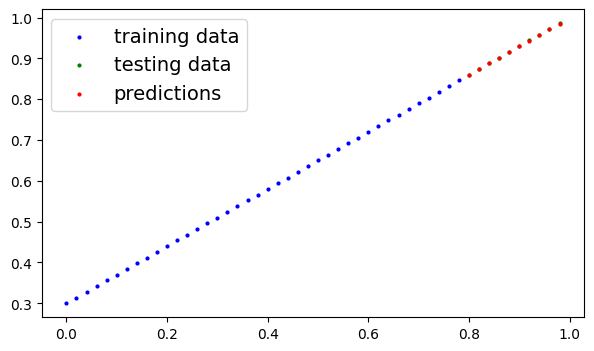

In [ ]:
# check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

In [ ]:
## saving & loading a trained model

from pathlib import Path

# 1. create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. save the model sate dict
print(f"saving mmodel to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


saving mmodel to: models/01_pytorch_workflow_model_1.pth


In [ ]:
#load a PyTorch

#create anew instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

#load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
#evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(x_test)
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')